# Retail Profitability Strategic Market Insights
## Notebook 02: Exploratory Data Analysis

### Objective:
Perform exploratory data analysis (EDA) to uncover trends, distributions, and potential insights in the Global Superstore dataset.


In [2]:
# Testing Code

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_superstore.csv")

# Display dataset information
print("Dataset Information:")
df.info()

# Preview the first few rows of the dataset
print("\nPreview of the Dataset:")
print(df.head())

Matplotlib is building the font cache; this may take a moment.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        51290 non-null  object 
 1   city            51290 non-null  object 
 2   country         51290 non-null  object 
 3   customer_id     51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   discount        51290 non-null  float64
 6   market          51290 non-null  object 
 7   order_date      51290 non-null  object 
 8   order_id        51290 non-null  object 
 9   order_priority  51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  product_name    51290 non-null  object 
 12  profit          51290 non-null  float64
 13  quantity        51290 non-null  int64  
 14  region          51290 non-null  object 
 15  sales           51290 non-null  int64  
 16  segment         51290 non-null  object 
 17  ship_date 

## Step 1: Data Overview

### 1. Load the dataset

In [3]:
# Import necessary libraries
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_superstore.csv")

### 2. Dataset Information: Display the dataset’s structure, column data types, and memory usage.

In [4]:
# Display dataset info
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        51290 non-null  object 
 1   city            51290 non-null  object 
 2   country         51290 non-null  object 
 3   customer_id     51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   discount        51290 non-null  float64
 6   market          51290 non-null  object 
 7   order_date      51290 non-null  object 
 8   order_id        51290 non-null  object 
 9   order_priority  51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  product_name    51290 non-null  object 
 12  profit          51290 non-null  float64
 13  quantity        51290 non-null  int64  
 14  region          51290 non-null  object 
 15  sales           51290 non-null  int64  
 16  segment         51290 non-null  object 
 17  ship_date 

### 3. Preview the Dataset: View the first few rows of the dataset.

In [5]:
# Preview the dataset
print("\nPreview of the Dataset:")
print(df.head())


Preview of the Dataset:
          category         city        country customer_id     customer_name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   discount market  order_date        order_id order_priority  ... sales  \
0       0.0     US  2011-01-07  CA-2011-130813           High  ...    19   
1       0.0     US  2011-01-21  CA-2011-148614         Medium  ...    19   
2       0.0     US  2011-08-05  CA-2011-118962         Medium  ...    21   
3       0.0     US  2011-08-05  CA-2011-118962         Medium  ...   111   
4       0.0     US  2011-09-29  CA-2011-146969           High  ...     6   

    segment   ship_date       ship_mo

### 4. Summary Statistics:

In [6]:
# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


Summary Statistics for Numeric Columns:
           discount        profit      quantity         sales  shipping_cost  \
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
mean       0.142908     28.610982      3.476545    246.498440      26.375818   
std        0.212280    174.340972      2.278766    487.567175      57.296810   
min        0.000000  -6599.978000      1.000000      0.000000       0.002000   
25%        0.000000      0.000000      2.000000     31.000000       2.610000   
50%        0.000000      9.240000      3.000000     85.000000       7.790000   
75%        0.200000     36.810000      5.000000    251.000000      24.450000   
max        0.850000   8399.976000     14.000000  22638.000000     933.570000   

               year       weeknum  
count  51290.000000  51290.000000  
mean    2012.777208     31.287112  
std        1.098931     14.429795  
min     2011.000000      1.000000  
25%     2012.000000     20.000000  
50%     2013.000000   

## Step 2: Investigating Potential Issues

### Objective:
- Explore and understand anomalies in the dataset, including:
  - Negative profit values.
  - Zero sales values.
  - Outliers in shipping costs.


In [7]:
# Rows with negative profit values
negative_profit = df[df['profit'] < 0]
print(f"Number of transactions with negative profit: {len(negative_profit)}")
print(negative_profit.head())

Number of transactions with negative profit: 12544
         category                 city country customer_id  customer_name  \
29009  Technology                Paris  France   RC-198252    Roy Collins   
29012  Technology              Taverny  France   TB-211752  Thomas Boland   
29018  Technology   Tremblay-en-France  France   DH-130752  Dave Hallsten   
29021  Technology           Guyancourt  France   MH-174552  Mark Hamilton   
29024  Technology  Le Plessis-Robinson  France   AA-104802   Andrew Allen   

       discount market  order_date         order_id order_priority  ... sales  \
29009      0.15     EU  2011-04-26  IT-2011-2185983       Critical  ...   684   
29012      0.15     EU  2011-08-26  ES-2011-5235241           High  ...   538   
29018      0.15     EU  2011-12-02  ES-2011-4614329           High  ...    95   
29021      0.15     EU  2012-06-07  ES-2012-2141914           High  ...   286   
29024      0.15     EU  2012-08-30  IT-2012-5602177         Medium  ...  1894   


In [8]:
# Rows with sales equal to 0
zero_sales = df[df['sales'] == 0]
print(f"Number of transactions with zero sales: {len(zero_sales)}")
print(zero_sales.head())


Number of transactions with zero sales: 1
              category     city        country customer_id     customer_name  \
46158  Office Supplies  Houston  United States   ZC-219104  Zuschuss Carroll   

       discount market  order_date        order_id order_priority  ... sales  \
46158       0.8     US  2014-06-20  US-2014-102288         Medium  ...     0   

        segment   ship_date       ship_mode shipping_cost  state sub_category  \
46158  Consumer  2014-06-24  Standard Class          0.01  Texas   Appliances   

       year        market2  weeknum  
46158  2014  North America       25  

[1 rows x 25 columns]


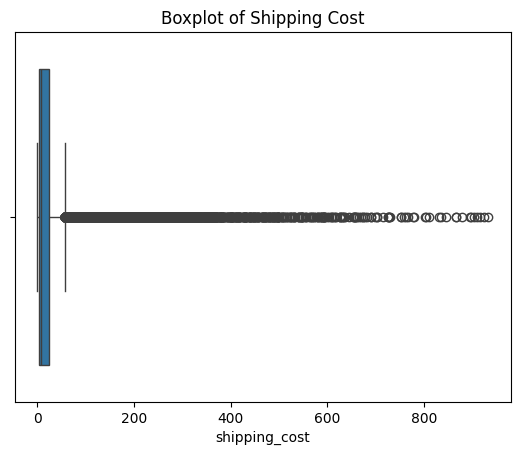

Number of transactions with high shipping costs (>500): 120
Number of transactions with very low shipping costs (<0.01): 2


In [9]:
# Visualize shipping cost distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['shipping_cost'])
plt.title("Boxplot of Shipping Cost")
plt.show()

# Check rows with unusually high or low shipping costs
high_shipping_costs = df[df['shipping_cost'] > 500]
low_shipping_costs = df[df['shipping_cost'] < 0.01]

print(f"Number of transactions with high shipping costs (>500): {len(high_shipping_costs)}")
print(f"Number of transactions with very low shipping costs (<0.01): {len(low_shipping_costs)}")

### Suggestions:

In [10]:
# Dropping transactions with zero sales
df = df[df['sales'] > 0]
print("Removed transactions with zero sales.")

Removed transactions with zero sales.


In [11]:
# Add a column to flag transactions with extremely high or low shipping costs for later investigation:
df['shipping_cost_outlier'] = df['shipping_cost'].apply(
    lambda x: 'High' if x > 500 else 'Low' if x < 0.01 else 'Normal'
)
print(df['shipping_cost_outlier'].value_counts())

shipping_cost_outlier
Normal    51167
High        120
Low           2
Name: count, dtype: int64


## Step 3: Univariate Analysis

### Objective:
- Analyze the distributions of key numeric columns like:
  - Sales
  - Profit
  - Quantity
  - Discount
  - Shipping Cost

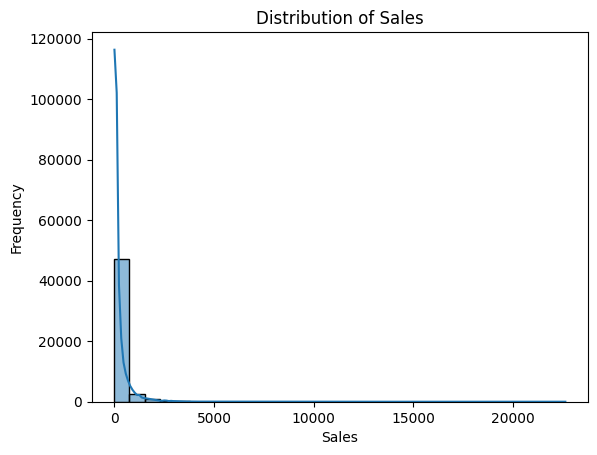

In [12]:
# Distribution of Sales
sns.histplot(df['sales'], kde=True, bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


### Insights: Distribution of Sales

1. **Right-Skewed Distribution**:
   - The distribution of sales is heavily right-skewed, with most transactions concentrated in the lower range.
   - A significant number of sales are below $1,000.

2. **Outliers**:
   - There are a few transactions with extremely high sales values exceeding $10,000.
   - These outliers may represent large orders or anomalies that should be further investigated.

3. **Key Observations**:
   - The high frequency of small sales suggests that the majority of transactions are low-value, which may align with retail businesses focusing on consumer products.
   - The outliers, although rare, could contribute significantly to the overall revenue.

4. **Next Steps**:
   - Perform bivariate analysis to examine how sales relate to other variables such as profit, discount, or shipping cost.
   - Investigate the outliers to determine if they represent legitimate transactions or errors.


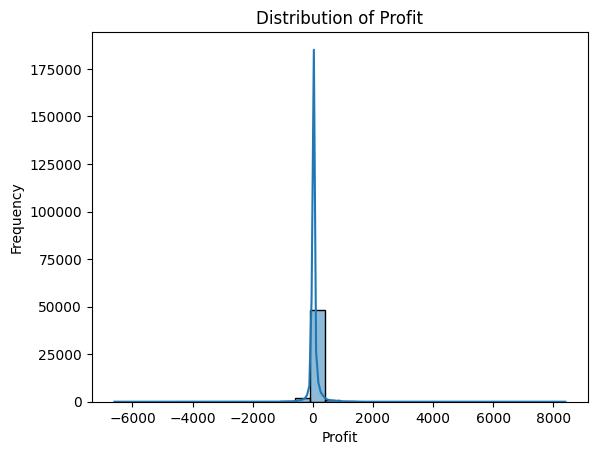

In [13]:
# Distribution of Profit
sns.histplot(df['profit'], kde=True, bins=30)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


### Insights: Distribution of Profit

1. **Heavily Centered Around Zero**:
   - The majority of transactions have profits clustered around 0, with very low profit or slight losses being the most frequent.
   - This suggests that many transactions are barely breaking even or incurring minor losses.

2. **Wide Range with Skewness**:
   - The distribution is slightly right-skewed, with profits extending to values above $8,000.
   - There are also negative profit values going as low as -$6,000, indicating significant losses for some transactions.

3. **Outliers**:
   - Both high positive and high negative profit values are present, representing extreme cases of profitable and unprofitable transactions.
   - The concentration near zero highlights the importance of investigating factors like discounts, shipping costs, and product categories to understand what drives these outliers.

4. **Key Observations**:
   - Transactions with losses (negative profits) could indicate issues like over-discounting, high shipping costs, or inefficiencies in certain regions or categories.
   - Highly profitable transactions may be associated with specific categories, regions, or customers that could be leveraged for growth.

5. **Next Steps**:
   - Perform bivariate analysis to explore the relationship between profit and variables like sales, discount, and shipping cost.
   - Investigate specific transactions with extreme profit or loss values for potential business insights or data anomalies.


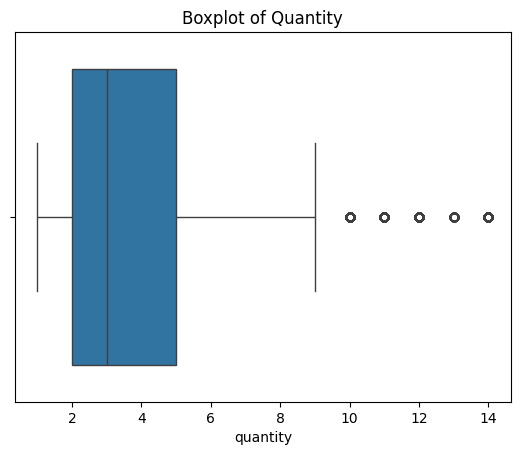

In [14]:
# Boxplot for Quantity
sns.boxplot(x=df['quantity'])
plt.title("Boxplot of Quantity")
plt.show()


### Insights: Boxplot of Quantity

1. **Median and Range**:
   - The median quantity of items per transaction is approximately 3.
   - Most transactions fall within the range of 2 to 5 items, as indicated by the interquartile range (IQR).

2. **Outliers**:
   - There are transactions with quantities as high as 14, which are considered outliers based on the boxplot.
   - These outliers may represent bulk orders or unusual customer behavior and warrant further investigation.

3. **Concentration**:
   - The majority of transactions involve small quantities, reflecting typical retail consumer purchasing behavior.

4. **Key Observations**:
   - The presence of outliers suggests that a small number of transactions involve significantly larger quantities than average.
   - Understanding the context of these high-quantity transactions could provide insights into specific customer segments or product categories.

5. **Next Steps**:
   - Perform bivariate analysis to explore the relationship between quantity and variables like profit, sales, or category.
   - Investigate outlier transactions to determine if they correspond to specific products or promotional events.


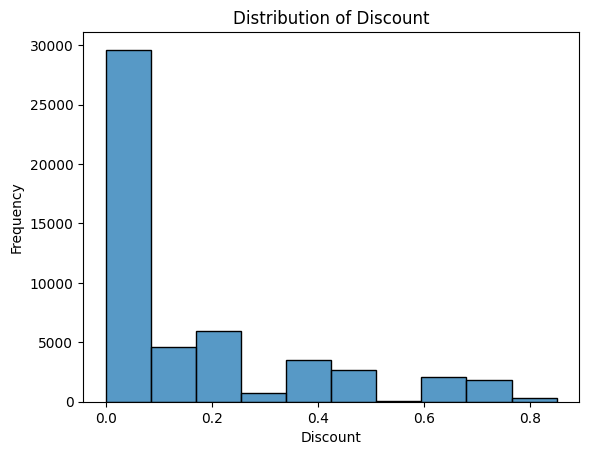

In [15]:
# Distribution of Discount
sns.histplot(df['discount'], kde=False, bins=10)
plt.title("Distribution of Discount")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()


### Insights: Distribution of Discount

1. **Concentration of Zero Discounts**:
   - A large proportion of transactions (~30,000) have a discount of 0. This suggests that most sales occur without applying any discount.

2. **Discount Ranges**:
   - Discounts are distributed primarily between 0.0 and 0.2, with fewer transactions at higher discount levels.
   - There are smaller peaks around 0.2, 0.4, and 0.6, indicating occasional promotions or discount strategies.

3. **Maximum Discount**:
   - The highest discount offered is 0.85 (85%), but such cases are rare, as shown by the low frequency in the higher bins.

4. **Key Observations**:
   - The dominance of zero-discount transactions could indicate a pricing strategy focused on minimal discounts or a higher reliance on full-price sales.
   - The presence of high discounts, while rare, might align with specific product categories, regions, or promotional campaigns.

5. **Next Steps**:
   - Perform bivariate analysis to explore the relationship between discount and profit, sales, or product categories.
   - Investigate whether high-discount transactions are associated with large negative profits or specific customer segments.


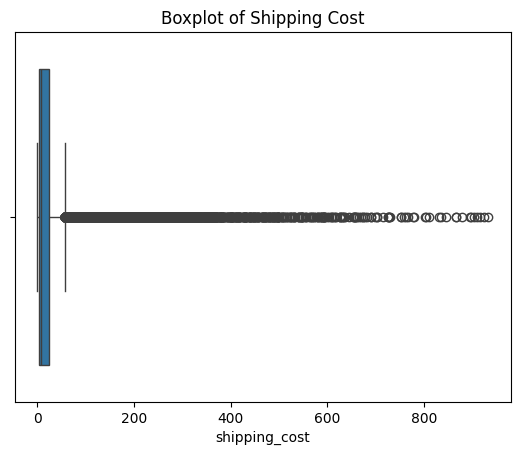

In [16]:
# Boxplot for Shipping Cost
sns.boxplot(x=df['shipping_cost'])
plt.title("Boxplot of Shipping Cost")
plt.show()


### Insights: Boxplot of Shipping Cost

1. **Skewed Distribution**:
   - The shipping costs are highly skewed, with the majority of transactions clustered close to 0.

2. **Presence of Outliers**:
   - A significant number of outliers are present, with shipping costs exceeding $500 in some cases.
   - These outliers might correspond to international shipments, expedited deliveries, or data errors.

3. **Concentration of Low Costs**:
   - Most shipping costs are relatively low, suggesting that standard shipping methods are likely used for the majority of transactions.

4. **Key Observations**:
   - The large number of outliers indicates a wide variability in shipping costs, which may impact profitability.
   - High shipping costs could be influencing negative profit transactions observed earlier.

5. **Next Steps**:
   - Investigate the relationship between shipping costs and profit to determine if high costs consistently lead to losses.
   - Examine outlier transactions to understand the causes of high shipping costs (e.g., regions, shipping modes, or product types).


## Step 4: Bivariate Analysis

### Objective:
- Investigate relationships between key variables to understand how they interact.
- Identify trends, correlations, and potential drivers of sales and profit.


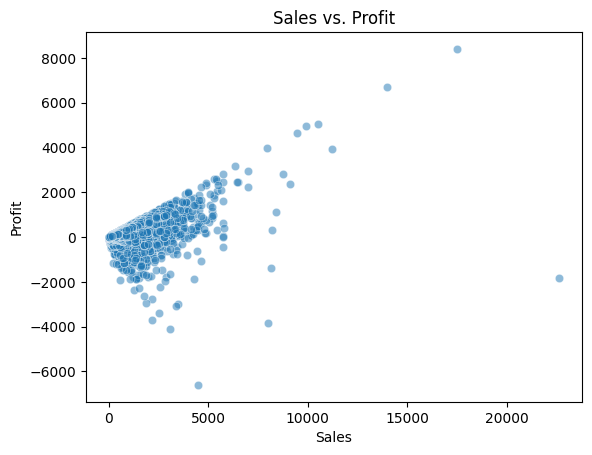

In [17]:
# Scatterplot: Sales vs. Profit
sns.scatterplot(x='sales', y='profit', data=df, alpha=0.5)
plt.title("Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


### Insights: Sales vs. Profit

1. **Positive Correlation with Variations**:
   - There is a general positive correlation between sales and profit, as higher sales tend to result in higher profits.
   - However, this trend is not consistent for all points, as some transactions with high sales result in negative or minimal profits.

2. **Clusters of Transactions**:
   - A dense cluster of points exists where sales are below $5,000, with profits mostly ranging from $0 to $2,000.
   - This indicates that the majority of transactions involve smaller sales with moderate profits.

3. **Outliers**:
   - A few transactions with extremely high sales (above $10,000) are visible, with profits exceeding $8,000 in some cases.
   - Conversely, some transactions show significant losses, with profits as low as -$6,000, even for sales above $5,000.

4. **Key Observations**:
   - Transactions with negative profits, despite high sales, could be influenced by factors like excessive discounts, high shipping costs, or unprofitable product categories.
   - The positive correlation suggests that increasing sales generally improves profitability, but operational inefficiencies or pricing strategies might dilute this effect in certain cases.

5. **Next Steps**:
   - Investigate transactions with high sales but negative profits to identify the causes of losses.
   - Analyze the impact of discounts, shipping costs, and product categories on profit for these high-sales transactions.


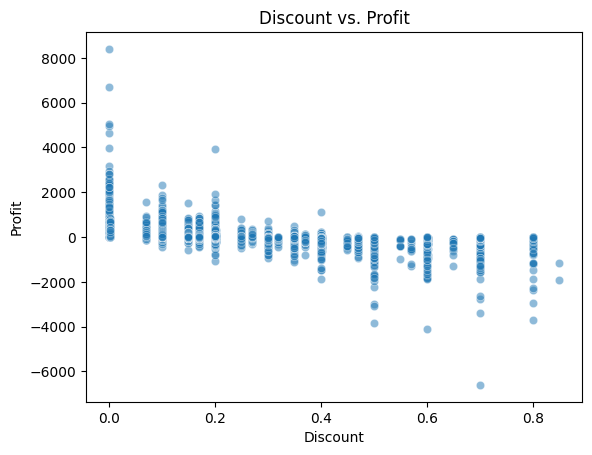

In [18]:
# Scatterplot: Discount vs. Profit
sns.scatterplot(x='discount', y='profit', data=df, alpha=0.5)
plt.title("Discount vs. Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


### Insights: Discount vs. Profit

1. **Negative Correlation**:
   - The scatterplot shows a clear **negative correlation** between discount and profit.
   - As the discount increases, the profit generally decreases.

2. **High Discounts Lead to Losses**:
   - Transactions with higher discounts (e.g., above 0.5 or 50%) often result in negative profits.
   - This trend suggests that excessive discounts may erode margins, leading to losses.

3. **Profit with No Discounts**:
   - For transactions with no discounts (`discount = 0`), profits are more varied, ranging from significant gains (up to $8,000) to occasional losses.
   - This indicates that profit is not solely dependent on discounts but influenced by other factors as well (e.g., shipping costs, product categories).

4. **Clusters of Data**:
   - The points are densely clustered for discounts below 0.2, with a mix of profits and losses.
   - Discounts above 0.5 show fewer transactions but are more consistently associated with losses.

5. **Key Observations**:
   - While small discounts may help boost sales without drastically affecting profits, larger discounts (above 50%) seem unsustainable.
   - High-discount transactions may be promotional or clearance sales that are not profitable.

6. **Next Steps**:
   - Investigate the relationship between discount, sales, and product categories to identify which discounts work best.
   - Analyze specific transactions with high discounts and severe losses to understand their context (e.g., product type, region, or shipping costs).


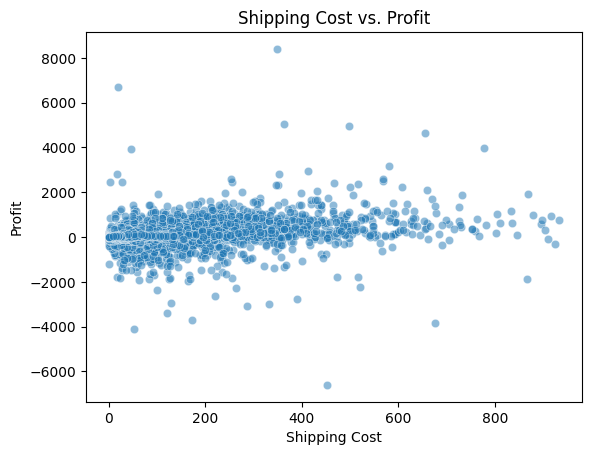

In [19]:
# Scatterplot: Shipping Cost vs. Profit
sns.scatterplot(x='shipping_cost', y='profit', data=df, alpha=0.5)
plt.title("Shipping Cost vs. Profit")
plt.xlabel("Shipping Cost")
plt.ylabel("Profit")
plt.show()


### Insights: Shipping Cost vs. Profit

1. **Weak Negative Trend**:
   - The scatterplot shows a **weak negative trend** between shipping cost and profit.
   - Higher shipping costs tend to correspond to lower profits, but the relationship is not strongly linear.

2. **Cluster of Low Shipping Costs**:
   - The majority of transactions have shipping costs below $200, and profits in this range are more varied (ranging from large gains to significant losses).
   - This suggests that low shipping costs do not always guarantee profitability.

3. **High Shipping Costs Lead to Losses**:
   - Transactions with shipping costs exceeding $400 are more frequently associated with negative profits.
   - This highlights the potential burden of high shipping costs on overall profitability.

4. **Outliers**:
   - Some transactions with low shipping costs show extremely high profits (above $8,000).
   - Conversely, a few transactions with moderate shipping costs (around $200–$400) exhibit large losses (below -$6,000).

5. **Key Observations**:
   - Shipping costs can significantly impact profitability, especially for high-cost transactions.
   - The variability in profits for low shipping costs suggests that other factors, such as discounts or product pricing, also play a significant role.

6. **Next Steps**:
   - Perform bivariate analysis of shipping cost with other variables (e.g., sales, discount, and region) to understand what drives high shipping costs.
   - Investigate outlier transactions with extreme profits or losses to identify any operational inefficiencies or exceptional cases.


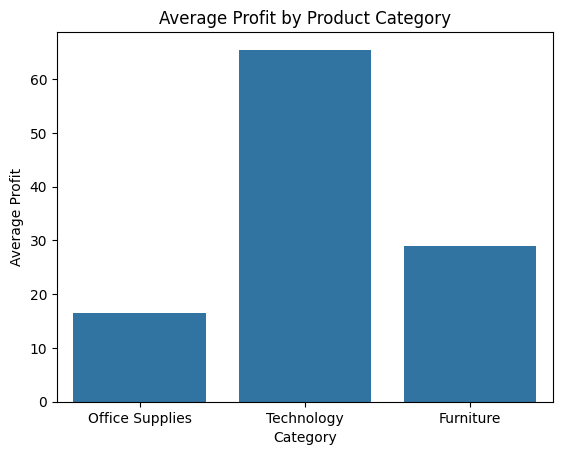

In [20]:
# Barplot: Average Profit by Category
sns.barplot(x='category', y='profit', data=df, errorbar=None)
plt.title("Average Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.show()


### Insights: Average Profit by Product Category

1. **Technology Leads in Profitability**:
   - The **Technology** category has the highest average profit among all categories, significantly outperforming Furniture and Office Supplies.
   - This suggests that technology products may have higher margins or are more efficiently sold.

2. **Office Supplies and Furniture**:
   - **Office Supplies** and **Furniture** have considerably lower average profits compared to Technology.
   - While still profitable, these categories may have lower margins or higher associated costs.

3. **Key Observations**:
   - The disparity in average profits highlights that the Technology category is a key driver of overall profitability.
   - The lower average profit in Office Supplies and Furniture may reflect higher operational costs, lower sales prices, or greater discounts.

4. **Next Steps**:
   - Investigate the product sub-categories within Technology, Furniture, and Office Supplies to identify specific drivers of profit.
   - Compare profit margins across regions for each category to understand if geographic factors influence these results.


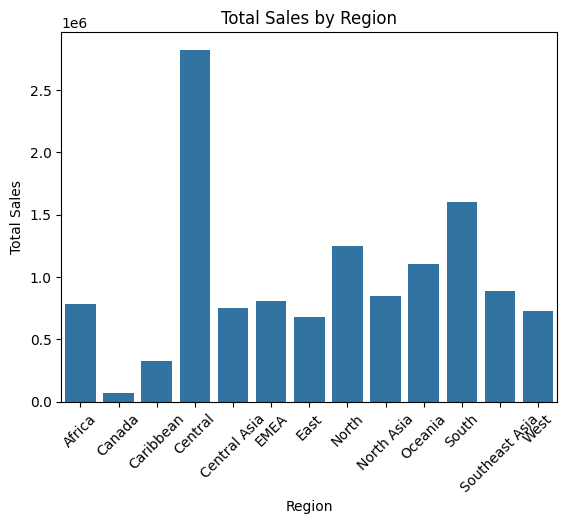

In [21]:
# Barplot: Total Sales by Region
region_sales = df.groupby('region')['sales'].sum().reset_index()
sns.barplot(x='region', y='sales', data=region_sales, errorbar=None)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()


### Insights: Total Sales by Region

1. **Top-Performing Region**:
   - The **Central** region has the highest total sales, significantly outperforming other regions.
   - This indicates that the Central region is a critical driver of revenue and may benefit from further investment in operations or marketing.

2. **Moderate Sales Regions**:
   - Regions like **South**, **East**, and **North Asia** show moderate sales performance.
   - These regions represent stable contributors to revenue but may have untapped potential for growth.

3. **Low-Performing Regions**:
   - Regions such as **Caribbean**, **Africa**, and **Canada** have the lowest total sales.
   - These regions might require closer examination to understand the challenges (e.g., demand, operational issues, or limited product availability).

4. **Geographic Distribution**:
   - The disparity in sales across regions highlights significant variations in customer demand and market conditions.

5. **Key Observations**:
   - The Central region’s dominance may indicate strong market penetration, higher purchasing power, or successful regional strategies.
   - Lower-performing regions could either be underdeveloped markets or less prioritized regions in terms of business operations.

6. **Next Steps**:
   - Conduct a deeper analysis of the Central region to identify successful strategies that can be replicated in other regions.
   - Investigate challenges in low-performing regions to determine if they are addressable through operational changes, marketing efforts, or product diversification.
   - Compare profit margins across regions to understand if high sales also translate into higher profitability.


### Exporting Cleaned Dataset
After performing all the cleaning and analysis steps, the cleaned dataset is exported to be used for further visualization and analysis in Tableau.


In [22]:
# Exporting the cleaned dataset after EDA
df.to_csv('superstore_eda_cleaned.csv', index=False)
print("Cleaned dataset saved as 'superstore_eda_cleaned.csv'.")

Cleaned dataset saved as 'superstore_eda_cleaned.csv'.


## Summary of Findings: Exploratory Data Analysis

### Objective:
The primary goal of this analysis was to uncover key patterns, trends, and insights from the Global Superstore dataset, focusing on sales, profit, discounts, shipping costs, and regional performance.

---

### Key Insights:

#### **1. Sales and Profit Trends**
- **Positive Correlation**:
  - Sales and profit exhibit a positive relationship overall, indicating that higher sales tend to result in higher profits.
  - However, some high-sales transactions resulted in negative profits, highlighting inefficiencies such as high discounts or shipping costs.

#### **2. Discount Impact**
- **Negative Impact on Profit**:
  - Discounts show a negative correlation with profit. Higher discounts (above 50%) consistently result in losses.
  - Moderate discounts (below 20%) seem to balance sales growth and profitability.

#### **3. Shipping Costs**
- **High Costs Reduce Profit**:
  - Shipping costs have a weak negative correlation with profit. Transactions with shipping costs exceeding $400 are often unprofitable.
  - Most transactions incur low shipping costs, which vary widely in terms of profitability.

#### **4. Category Insights**
- **Technology Leads Profitability**:
  - Technology products generate the highest average profit, significantly outperforming Office Supplies and Furniture categories.
  - Office Supplies and Furniture have lower margins, possibly due to higher discounts or operational costs.

#### **5. Regional Performance**
- **Central Region Dominates**:
  - The Central region accounts for the highest total sales, making it a critical revenue driver.
  - Low-performing regions, such as the Caribbean, Africa, and Canada, may require additional investment or strategy adjustments to improve sales.

---

### Recommendations:
1. **Optimize Discounts**:
   - Review transactions with high discounts and losses to refine pricing strategies.
   - Experiment with moderate discounts (10–20%) to boost sales while maintaining profitability.

2. **Address High Shipping Costs**:
   - Investigate drivers of high shipping costs for unprofitable transactions.
   - Explore cost-efficient shipping options, especially for international transactions.

3. **Focus on High-Performing Categories**:
   - Invest more in the Technology category to capitalize on its high profitability.
   - Evaluate cost structures for Office Supplies and Furniture to identify areas for improvement.

4. **Expand Regional Strategies**:
   - Leverage successful strategies from the Central region in underperforming regions.
   - Investigate barriers to growth in low-performing regions (e.g., demand, logistics, or product availability).

5. **Further Analysis**:
   - Explore customer segmentation to identify high-value customers and tailor marketing efforts.
   - Conduct a time-series analysis to forecast sales and profit trends.

---

### Next Steps:
- Transition findings into Tableau to create interactive dashboards for visualization.
- Use insights to propose actionable recommendations for business decision-making.
